# Нейронные сети с TensorFlow


Установка (https://www.tensorflow.org/)
* pip3 install tensorflow
* pip3 install tensorflow-gpu

In [1]:
import tensorflow as tf

# Model parameters
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
linear_model = W * x + b
y = tf.placeholder(tf.float32)

In [2]:
# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)

In [3]:
# training data
x_train = [1, 2, 3, 4]
y_train = [0, -1, -2, -3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) # reset values to wrong
for i in range(1000):
  sess.run(train, {x: x_train, y: y_train})

In [4]:
# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [-0.9999969] b: [ 0.99999082] loss: 5.69997e-11


![Graph](https://www.tensorflow.org/images/getting_started_final.png)

### Линейная модель с TF

In [6]:
import numpy as np

# Declare list of features. We only have one numeric feature. There are many
# other types of columns that are more complicated and useful.
feature_columns = [tf.feature_column.numeric_column("x", shape=[1])]

# An estimator is the front end to invoke training (fitting) and evaluation
# (inference). There are many predefined types like linear regression,
# linear classification, and many neural network classifiers and regressors.
# The following code provides an estimator that does linear regression.
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

# TensorFlow provides many helper methods to read and set up data sets.
# Here we use two data sets: one for training and one for evaluation
# We have to tell the function how many batches
# of data (num_epochs) we want and how big each batch should be.
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# We can invoke 1000 training steps by invoking the  method and passing the
# training data set.
estimator.train(input_fn=input_fn, steps=1000)

# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanek\\AppData\\Local\\Temp\\tmpio5jevc_', '_session_config': None, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\sanek\AppData\Local\Temp\tmpio5jevc_\model.ckpt.
INFO:tensorflow:loss = 23.0, step = 1
INFO:tensorflow:global_step/sec: 864.151
INFO:tensorflow:loss = 0.339491, step = 101 (0.116 sec)
INFO:tensorflow:global_step/sec: 804.689
INFO:tensorflow:loss = 0.0895204, step = 201 (0.126 sec)
INFO:tensorflow:global_step/sec: 1135.88
INFO:tensorflow:loss = 0.016626, step = 301 (0.086 sec)
INFO:tensorflow:global_step/sec: 839.79
INFO:tensorflow:loss = 0.00179059, step = 401 (0.119 sec)
INFO:tensorflow:global_step/sec: 800.343
INFO:ten

In [7]:
def model_fn(features, labels, mode):
  # Build a linear model and predict values
  W = tf.get_variable("W", [1], dtype=tf.float64)
  b = tf.get_variable("b", [1], dtype=tf.float64)
  y = W * features['x'] + b
  # Loss sub-graph
  loss = tf.reduce_sum(tf.square(y - labels))
  # Training sub-graph
  global_step = tf.train.get_global_step()
  optimizer = tf.train.GradientDescentOptimizer(0.01)
  train = tf.group(optimizer.minimize(loss),
                   tf.assign_add(global_step, 1))
  # EstimatorSpec connects subgraphs we built to the
  # appropriate functionality.
  return tf.estimator.EstimatorSpec(
      mode=mode,
      predictions=y,
      loss=loss,
      train_op=train)

In [8]:
estimator = tf.estimator.Estimator(model_fn=model_fn)
# define our data sets
x_train = np.array([1., 2., 3., 4.])
y_train = np.array([0., -1., -2., -3.])
x_eval = np.array([2., 5., 8., 1.])
y_eval = np.array([-1.01, -4.1, -7, 0.])
input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_train}, y_train, batch_size=4, num_epochs=1000, shuffle=False)
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    {"x": x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

# train
estimator.train(input_fn=input_fn, steps=1000)
# Here we evaluate how well our model did.
train_metrics = estimator.evaluate(input_fn=train_input_fn)
eval_metrics = estimator.evaluate(input_fn=eval_input_fn)
print("train metrics: %r"% train_metrics)
print("eval metrics: %r"% eval_metrics)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sanek\\AppData\\Local\\Temp\\tmp8g645voq', '_session_config': None, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\sanek\AppData\Local\Temp\tmp8g645voq\model.ckpt.
INFO:tensorflow:loss = 14.1751990025, step = 1
INFO:tensorflow:global_step/sec: 472.638
INFO:tensorflow:loss = 0.0465300076339, step = 101 (0.216 sec)
INFO:tensorflow:global_step/sec: 605.833
INFO:tensorflow:loss = 0.0037987119056, step = 201 (0.164 sec)
INFO:tensorflow:global_step/sec: 547.825
INFO:tensorflow:loss = 0.000178191603373, step = 301 (0.188 sec)
INFO:tensorflow:global_step/sec: 668.786
INFO:tensorflow:loss = 8.47568031236e-06, step = 401 (0.151 sec)
INFO:tenso

### Обучение на базе MNIST с TF

Загрузим наши данные

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


![Картинка](https://www.tensorflow.org/images/MNIST-Matrix.png)

In [14]:
def plot_images_separately(images):
    "Plot the six MNIST images separately."
    fig = plt.figure()
    for j in range(1, 7):
        ax = fig.add_subplot(1, 6, j)
        ax.matshow(np.reshape(images[j-1], (28, 28)), cmap = matplotlib.cm.binary)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
    plt.show()

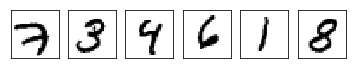

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


In [15]:
plot_images_separately(mnist.train.images)
print(mnist.train.labels[0:6])

Единицы соответствуют индексу класса

### Однослойная нейронная сеть

Построим модель в tensorflow. Tensorflow - это графический фраемворк, предназначенный в первую очередь для работы с нейронными сетями. На самом деле Вы можете создавать здесь любые алгоритмы машинного обучения. Основная идея работы с tensorflow - вы описываете порядок, в котором создаются переменные и выполняются операции, после чего запускаете обсчёт всего графа. 

В примере ниже мы создаем простейщую модель: 
$y = \mbox{softmax}(Wx + b)$

In [30]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [31]:
y = tf.matmul(x,W) + b

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Обратите внимание, что в tensorflow существует два вида перменных. 
tf.placeholder - переменные, значения которых подаются из вне. 
tf.Variable - переменные, которые как-то определяются внутри графа и могут зависеть от внешних переменных. Только tf.Variable могут быть обучаемыми переменными. 

In [34]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
      batch = mnist.train.next_batch(100)
      train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.92
